## Required imports

In [1]:
%matplotlib notebook

import sys, os, time
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import interact, HBox, VBox

import scipy.signal

#import pyabf # see: https://github.com/swharden/pyABF

# need this to update matplotlib plots in jupyter notebook
#plt.ion()

# These two lines will auto reload imports, in particular bAnalysis
%load_ext autoreload
%autoreload 2

# needed to import from sanpy/ which is one folder up
sys.path.append("..") # Adds higher directory to python modules path.

from sanpy import bAnalysis
from sanpy import bAnalysisPlot

ba = None # global bAnalysis object, used throughout this notebook

## Manually load an .abf file using bAnalysis 

In [2]:
file = '../data/19114001.abf'
ba = bAnalysis.bAnalysis(file)

# ba is an object of type bAnalysis, see bAnalysis.py for its data members and member functions 

# print some info about it
print(ba)

# get the sweep list
print('ba.sweepList:', ba.sweepList)

# set the sweep (there will be no output)
ba.setSweep(0)

# set a sweep that does not exist
#ba.setSweep(10)

# get dataPointsPerMs
print('ba.dataPointsPerMs:', ba.dataPointsPerMs)

file: ../data/19114001.abf
ABF (version 2.0.0.0) with 1 channel (mV), sampled at 20.0 kHz, containing 1 sweep, having no tags, with a total length of 1.00 minutes, recorded with protocol "Gapfree AP".
ba.sweepList: [0]
ba.dataPointsPerMs: 20


## Interface to load an abf file

<IPython.core.display.Javascript object>


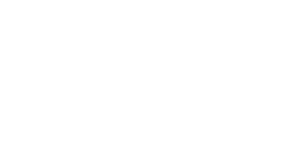

lines0: [<matplotlib.lines.Line2D object at 0x120bd1fd0>]


In [6]:
#from IPython.display import clear_output

path = '../data'

gSelectedFile = ''
gShowAxis = True

# get .abf files
files = []
for file in os.listdir(path):
    if file.startswith('.'):
        continue
    if file.endswith('.abf'):
        files.append(file)

def fileList_callback(b):
    newValue = b['new']
    
    global gSelectedFile
    gSelectedFile = newValue
    
    file = os.path.join(path, newValue)
    global ba
    ba = bAnalysis.bAnalysis(file)
    ba.getDerivative()
    
    #clear_output()
    myAxis.clear()
    bAnalysisPlot.bPlot.plotSpikes(ba, ax=myAxis)
    # this works
    #bAnalysisPlot.bPlot.plotDeriv(ba, fig=fig)
    global sweeps
    sweepList.options = ba.sweepList

    #
    fig.patch.set_visible(False)
    myAxis.axis('off')

fileList = widgets.Select(
    options=files,
    # rows=10,
    description='fileList',
    disabled=False
)

def sweepList_callback(b):
    print('sweepList_callback()')
    newValue = b['new']
    global ba
    ba.setSweep(newValue)
    #clear_output()
    #myAxis.clear()
    bAnalysisPlot.bPlot.plotSpikes(ba, ax=myAxis)

sweeps = []
sweepList = widgets.Select(
    options=sweeps,
    # rows=10,
    description='sweeps',
    disabled=False
)

# load button
# load is implicit when file is selected in list !!!
def loadButton_callback(b):
    file = os.path.join(path, fileList.value)
    
    global ba
    ba = bAnalysis.bAnalysis(file)
    
    #clear_output()
    myAxis.clear()
    bAnalysisPlot.bPlot.plotSpikes(ba, ax=myAxis)
    global sweeps
    sweepList.options = ba.sweepList
    
loadButton = widgets.Button(
    description='Load',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Load selected file'
)
loadButton.on_click(loadButton_callback)

# save button to save as pdf
def saveButton_callback(b):
    saveFileName = gSelectedFile + '.pdf'
    fig.savefig(saveFileName)
    
saveButton = widgets.Button(
    description='Save pdf',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Save Vm as pdf'
)
saveButton.on_click(saveButton_callback)

def showAxis(on):
    pass
    if on:
        fig.patch.set_visible(True)
        myAxis.axis('on')
    else:
        fig.patch.set_visible(False)
        myAxis.axis('off')

# checkbox to turn plot axis on/off
def toggleAxis_callback(b):
    newValue = b['new']
    # newValue is updated multiple times per click of checkbox
    # newValue values are: {}, then boolean, then dict again ????
    # here we just check if newValue is an int (same as bool)
    if isinstance(newValue, (int)):
        #print('toggleAxis_callback() b["new"]:', newValue)
        showAxis(newValue)
    else:
        pass
    
toggleAxis = widgets.Checkbox(
    value=False,
    description='Show Axis',
    disabled=False
)
#toggleAxis.observe(toggleAxis_callback)

#sweepList.observe(sweepList_callback, names='value')
#fileList.observe(fileList_callback, names='value')

fig,myAxis = plt.subplots(1,1)
#fig = plt.figure(figsize=(4, 4))
#myAxis = fig.add_subplot(1, 1 , 1)

lines0 = myAxis.plot([1,2],[5,10]) # lines0 is a list of lines
print('lines0:', lines0)
#fig.show()
fig.canvas.draw()


#
#showAxis(gShowAxis)

#vBox_buttons = VBox(children=[loadButton, saveButton, toggleAxis])

#HBox(children=[fileList, sweepList, vBox_buttons])



## Check the derivative of Vm (dV/dt) to select threshold for spike detection.

<IPython.core.display.Javascript object>


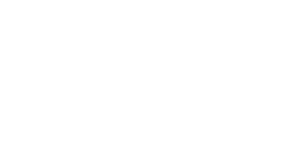

<IPython.core.display.Javascript object>


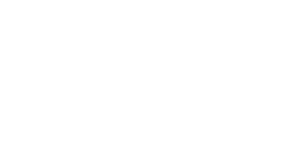

In [15]:
myMedianFiler = 5
ba.getDerivative(medianFilter=myMedianFiler)

bAnalysisPlot.bPlot.plotDeriv(ba)

## Run spike detection with myThreshold and plot results

bAnalysis.spikeDetect0()
	dVthresholdPos: 100
	minSpikeVm: -20
	medianFilter: 0
bAnalysis.spikeDetect() for file ../data/19114001.abf detected 103 spikes in 0.05 seconds


<IPython.core.display.Javascript object>


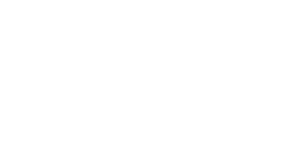

(None, <AxesSubplot:xlabel='Time (sec)', ylabel='Vm (mV)'>)

In [16]:
# load a file
#file = 'data/19114001.abf'
#ba = bAnalysis.bAnalysis(file)

# spike detect
myThreshold = 100
myMinSpikeVm = -20
halfHeights = [20, 50, 80]
ba.getDerivative()
ba.spikeDetect(dVthresholdPos=myThreshold, minSpikeVm=myMinSpikeVm, halfHeights=halfHeights)

#
# plot Vm with all detected spikes (threshold, peak, pre/post min, half-wdiths
fig = plt.figure(figsize=(10, 4))
myAxis = fig.add_subplot(1, 1 , 1)

bAnalysisPlot.bPlot.plotSpikes(ba, ax=myAxis)



## Make a spike browser

In [14]:
currentSpikeNumber = 1

#
# make a figure with subplots and plot it once
grid = plt.GridSpec(3, 2, wspace=0.2, hspace=0.4)

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(grid[0, 0:]) #Vm, entire sweep
ax2 = fig.add_subplot(grid[1, 0:]) #Vm, middle zoom
ax3 = fig.add_subplot(grid[2, 0]) #Vm, spike clip
ax4 = fig.add_subplot(grid[2, 1]) #phase plot

#
# plot vm
line1 = bAnalysisPlot.bPlot.plotSpikes(ba, oneSpikeNumber=currentSpikeNumber, ax=ax1)

#
# plot middle view with intermediate x-axis
line2 = bAnalysisPlot.bPlot.plotSpikes(ba, oneSpikeNumber=currentSpikeNumber, ax=ax2)

#
# plot all clips
line3 = bAnalysisPlot.bPlot.plotClips(ba, oneSpikeNumber=currentSpikeNumber, ax=ax3)

#
# plot one spike phase plot
line4 = bAnalysisPlot.bPlot.plotPhasePlot(ba, oneSpikeNumber=currentSpikeNumber, ax=ax4)

fig.show()
fig.canvas.draw()

def updatePlot(spikeNumber):
    ''' When called as an ipywidget callback, spikeNumber is a dicitonary !!!'''
    if isinstance(spikeNumber, dict):
        spikeNumber = spikeNumber['new']
    
    global currentSpikeNumber
    currentSpikeNumber = spikeNumber
    
    #
    # plot one spike (red circle)
    line1.set_xdata(ba.abf.sweepX[ba.spikeTimes[spikeNumber]])
    line1.set_ydata(ba.abf.sweepY[ba.spikeTimes[spikeNumber]])

    #
    # plot one spike clip
    if line3 is not None:
        line3.set_ydata(ba.spikeClips[spikeNumber])

    #
    # intermediate (x-axis) plot
    minTime = ba.abf.sweepX[ba.spikeTimes[spikeNumber]] - 0.75
    maxTime = ba.abf.sweepX[ba.spikeTimes[spikeNumber]] + 0.75
    ax2.axes.set_xlim(minTime, maxTime)
    line2.set_xdata(ba.abf.sweepX[ba.spikeTimes[spikeNumber]])
    line2.set_ydata(ba.abf.sweepY[ba.spikeTimes[spikeNumber]])
    
    #
    # phase plot
    filteredClip = scipy.signal.medfilt(ba.spikeClips[spikeNumber],3)
    dvdt = np.diff(filteredClip)
    # add an initial point so it is the same length as raw data in abf.sweepY
    dvdt = np.concatenate(([0],dvdt))
    
    line4.set_xdata(filteredClip)
    line4.set_ydata(dvdt)
    
    # trying to rescale the axis on each update, not working
    #ax4.autoscale_view()
    ax4.relim()
    
    fig.canvas.draw()
    
mySlider = widgets.IntSlider(
    min=0,
    max=ba.numSpikes-1,
    step=1,
    description='Spike Number',
    value=0,
    continuous_update=False)
mySlider.observe(updatePlot, names='value')

def on_slider_change(change):
    updatePlot(change['new'])
    
def myButton_prev_callback(b):
    global currentSpikeNumber
    currentSpikeNumber -= 1
    if currentSpikeNumber < 0:
        currentSpikeNumber = 0
    mySlider.value = currentSpikeNumber # mySlider will do an update

myButton_prev = widgets.Button(
    description='Previous Spike',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Go to previous spike'
)
myButton_prev.on_click(myButton_prev_callback)


def myButton_next_callback(b):
    global currentSpikeNumber
    currentSpikeNumber += 1
    if currentSpikeNumber > ba.numSpikes - 1:
        currentSpikeNumber = ba.numSpikes - 1
    mySlider.value = currentSpikeNumber # mySlider will do an update

myButton_next = widgets.Button(
    description='Next Spike',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Go to next spike'
)
myButton_next.on_click(myButton_next_callback)


# initial plot
updatePlot(spikeNumber=0)

# display the controls horizontally
HBox(children=[mySlider, myButton_prev, myButton_next])

<IPython.core.display.Javascript object>

IndexError: list index out of range

## Additional analysis

<IPython.core.display.Javascript object>


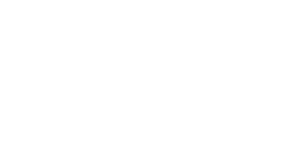

<IPython.core.display.Javascript object>


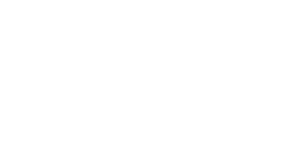

<IPython.core.display.Javascript object>


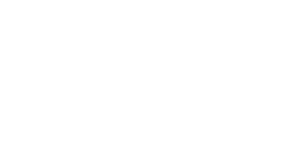

<IPython.core.display.Javascript object>


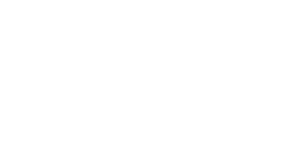

,file,condition1,condition2,condition3,spikeNumber,numError,errors,dVthreshold,minSpikeVm,medianFilter,...,postSpike_dvdt_min_val,postSpike_dvdt_min_val2,isi_pnts,isi_ms,spikeFreq_hz,cycleLength_pnts,cycleLength_ms,apDuration_ms,diastolicDuration_ms,widths
1,../data/19114001.abf,None,None,None,1,0,[],100,-20,0,...,17.700195,-61.035156,NaN,NaN,NaN,NaN,NaN,237.60,56.60,"[{'halfHeight': 20, 'risingPnt': 17633, 'risin..."
2,../data/19114001.abf,None,None,None,2,0,[],100,-20,0,...,46.386719,-61.035156,12836.0,641.80,1.558118,14128.0,706.40,302.20,45.05,"[{'halfHeight': 20, 'risingPnt': 30462, 'risin..."
3,../data/19114001.abf,None,None,None,3,0,[],100,-20,0,...,28.076172,-48.828125,14251.0,712.55,1.403410,13953.0,697.65,287.30,30.45,"[{'halfHeight': 20, 'risingPnt': 44721, 'risin..."
4,../data/19114001.abf,None,None,None,4,0,[],100,-20,0,...,45.776367,-48.828125,13466.0,673.30,1.485222,13946.0,697.30,311.30,58.85,"[{'halfHeight': 20, 'risingPnt': 58181, 'risin..."
5,../data/19114001.abf,None,None,None,5,0,[],100,-20,0,...,39.672852,-48.828125,11549.0,577.45,1.731752,10248.0,512.40,246.25,52.70,"[{'halfHeight': 20, 'risingPnt': 69731, 'risin..."
6,../data/19114001.abf,None,None,None,6,0,[],100,-20,0,...,29.296875,-61.035156,11182.0,559.10,1.788589,10994.0,549.70,236.85,55.70,"[{'halfHeight': 20, 'risingPnt': 80914, 'risin..."
7,../data/19114001.abf,None,None,None,7,0,[],100,-20,0,...,44.555664,-73.242188,12106.0,605.30,1.652073,12139.0,606.95,238.50,45.70,"[{'halfHeight': 20, 'risingPnt': 93020, 'risin..."
8,../data/19114001.abf,None,None,None,8,0,[],100,-20,0,...,32.348633,-73.242188,13581.0,679.05,1.472646,14181.0,709.05,268.50,47.95,"[{'halfHeight': 20, 'risingPnt': 106602, 'risi..."
9,../data/19114001.abf,None,None,None,9,0,[],100,-20,0,...,17.700195,-61.035156,9673.0,483.65,2.067611,8908.0,445.40,230.25,45.40,"[{'halfHeight': 20, 'risingPnt': 116274, 'risi..."


In [17]:
#
# plot the value of each spike amplitude over time of recording
# if this is changing during the recording then there might be problems
fig = plt.figure(figsize=(10, 4))
myAxis2 = fig.add_subplot(1, 1 , 1)

bAnalysisPlot.bPlot.plotTimeSeries(ba, stat='peak', ax=myAxis2)
    
#
# plot the value of each half-width for each spike over time of recording
fig = plt.figure(figsize=(10, 4))
myAxis3 = fig.add_subplot(1, 1 , 1)

for i, halfHeight in enumerate(halfHeights):
    bAnalysisPlot.bPlot.plotTimeSeries(ba, stat='halfWidth', halfWidthIdx=i, ax=myAxis3)
    
#
# plot ISI between each spike
fig = plt.figure(figsize=(10, 4))
myAxis4 = fig.add_subplot(1, 1 , 1)

bAnalysisPlot.bPlot.plotISI(ba, ax=myAxis4)

#
# plot isi[i] versus isi[i-1], e.g. a 'shot plot'
# this will show us if there is history between successive intervals
# if it is a circular cloud, then there is little/no history between successive ISI's
spikeTimes_sec = [x/ba.abf.dataPointsPerMs/1000 for x in ba.spikeTimes]
isi = np.diff(spikeTimes_sec)
isi_i = isi[1:len(isi)-1]
isi_i_minus_1 = isi[0:len(isi)-2]

grid = plt.GridSpec(1, 1, wspace=0.2, hspace=0.4)
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(grid[0, 0:]) #Vm, entire sweep
ax.plot(isi_i_minus_1, isi_i, 'ok')
ax.axes.set_xlim(0.2, 1)
ax.axes.set_ylim(0.2, 1)
ax.set_ylabel('ISI [i]')
ax.set_xlabel('ISI [i-1]')

#
# make a report of all spike times
from IPython.display import display, HTML

myStartSeconds = 0
myStopSeconds = 60
df = ba.report(myStartSeconds, myStopSeconds)

# for now, just showing first 10 spikes
display(df[1:10])

# not sure what this does but might be important
#display(HTML(df.to_html()))


## Statistics

In [8]:
from scipy import stats

#
# compare spike peaks at the start and end of the recording

# build a list of spike peaks
spikePeaks = [spike['peakVal'] for spike in ba.spikeDict]

# first 10 spikes peaks
first = spikePeaks[0:10]
mean1 = np.mean(first)
std1 = np.std(first)

# last 10 spikes peaks
last = spikePeaks[len(spikePeaks)-10:len(spikePeaks)-1]
mean2 = np.mean(last)
std2 = np.std(last)

p = stats.ttest_ind(first,last)

print('first ten spikes:', mean1, '+/-', std1)
print('last ten spikes:', mean2, '+/-', std2)
print('Testing if there is a significant difference between the first 10 and last 10 spike peaks.')
if p[1] < 0.05:
    print('p=', p[1], ' is SIGNIFICANT')
else:
    print('p=', p[1], ' is NOT SIGNIFICANT')


first ten spikes: 50.598145 +/- 0.793457
last ten spikes: 46.522354 +/- 1.0679806
Testing if there is a significant difference between the first 10 and last 10 spike peaks.
p= 7.227717009995907e-08  is SIGNIFICANT
